In [89]:
import pandas as pd

In [91]:

df = pd.read_csv("/Users/nandh/Downloads/archive (4)/IMDb Movies India.csv", encoding="latin-1")


In [93]:
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [95]:
print(df.columns)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [97]:
df.isnull().sum

<bound method DataFrame.sum of         Name   Year  Duration  Genre  Rating  Votes  Director  Actor 1  \
0      False   True      True  False    True   True     False    False   
1      False  False     False  False   False  False     False    False   
2      False  False     False  False    True   True     False    False   
3      False  False     False  False   False  False     False    False   
4      False  False     False  False    True   True     False    False   
...      ...    ...       ...    ...     ...    ...       ...      ...   
15504  False  False      True  False   False  False     False    False   
15505  False  False     False  False   False  False     False    False   
15506  False  False      True  False    True   True     False    False   
15507  False  False      True  False    True   True      True     True   
15508  False  False     False  False   False  False     False    False   

       Actor 2  Actor 3  
0        False    False  
1        False    False  
2 

In [99]:
print(df.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


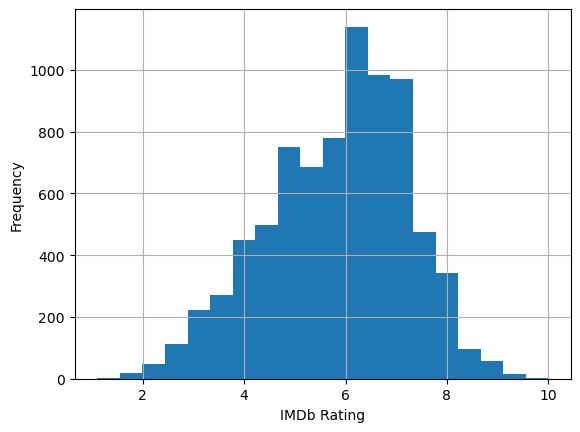

In [101]:
import matplotlib.pyplot as plt
df['Rating'].hist(bins=20)
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

In [103]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Genre'].fillna(df['Genre'].mode(),inplace=True)
df['Director'].fillna(df['Director'].mode(),inplace=True)
df['Actor 1'].fillna(df['Actor 1'].mode(),inplace=True)
df['Actor 2'].fillna(df['Actor 2'].mode(),inplace=True)
df['Actor 3'].fillna(df['Actor 3'].mode(),inplace=True)

C:\Users\nandh\AppData\Local\Temp\ipykernel_13164\2882291885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)
C:\Users\nandh\AppData\Local\Temp\ipykernel_13164\2882291885.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [105]:
top_directors = df['Director'].value_counts().nlargest(10)
print(top_directors)

Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
Nanabhai Bhatt      46
Dhirubhai Desai     46
B.R. Ishara         44
David Dhawan        44
Mohammed Hussain    44
Name: count, dtype: int64


In [117]:
top_directors = df['Director'].value_counts().nlargest(10).index
df['director_grouped'] = df['Director'].where(df['Director'].isin(top_directors), 'Other')
director_encoded = pd.get_dummies(df['director_grouped'], prefix='director')
print(top_directors)

Index(['Jayant Desai', 'Kanti Shah', 'Babubhai Mistry', 'Mahesh Bhatt',
       'Master Bhagwan', 'Nanabhai Bhatt', 'Dhirubhai Desai', 'B.R. Ishara',
       'David Dhawan', 'Mohammed Hussain'],
      dtype='object', name='Director')


In [109]:
actor_cols = ['Actor 1', 'Actor 2', 'Actor 3']
df[actor_cols] = df[actor_cols].fillna('').astype(str)
df['actors_list'] = df[actor_cols].apply(lambda r: [x for x in r.tolist() if x and x.lower()!='nan'], axis=1)

top_actor_k = 30
top_actors = df['actors_list'].explode().value_counts().nlargest(top_actor_k).index.tolist()
for a in top_actors:
    df[f'actor_{a}'] = df['actors_list'].apply(lambda L: 1 if a in L else 0)


In [111]:
print(top_actors)

['Mithun Chakraborty', 'Dharmendra', 'Ashok Kumar', 'Jeetendra', 'Amitabh Bachchan', 'Rekha', 'Rajesh Khanna', 'Shashi Kapoor', 'Shatrughan Sinha', 'Shakti Kapoor', 'Master Bhagwan', 'Sanjay Dutt', 'Akshay Kumar', 'Raj Babbar', 'Jackie Shroff', 'Sanjeev Kumar', 'Helen', 'Jeevan', 'Pran', 'Govinda', 'Rishi Kapoor', 'Dev Anand', 'Shabana Azmi', 'Vinod Khanna', 'Hema Malini', 'Ajit', 'Asrani', 'Bharat Bhushan', 'Anupam Kher', 'Ajay Devgn']


In [119]:
genre_encoded = pd.get_dummies(df['Genre'], prefix='genre')
print(genre_encoded)

       genre_Action  genre_Action, Adventure  \
0             False                    False   
1             False                    False   
2             False                    False   
3             False                    False   
4             False                    False   
...             ...                      ...   
15504          True                    False   
15505         False                    False   
15506          True                    False   
15507          True                    False   
15508         False                    False   

       genre_Action, Adventure, Biography  genre_Action, Adventure, Comedy  \
0                                   False                            False   
1                                   False                            False   
2                                   False                            False   
3                                   False                            False   
4                                

In [123]:
features = pd.concat([genre_encoded, director_encoded, df[[f'actor_{a}' for a in top_actors]], df[['Rating']]], axis=1)

In [127]:
from sklearn.model_selection import train_test_split

X = features.drop(columns=['Rating'])
y = features['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
lr = LinearRegression()
lr.fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [131]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
print('Linear Regression RMSE:', mean_squared_error(y_test, y_pred_lr, squared=False))
print('Linear Regression R2:', r2_score(y_test, y_pred_lr))
print('Random Forest RMSE:', mean_squared_error(y_test, y_pred_rf, squared=False))
print('Random Forest R2:', r2_score(y_test, y_pred_rf))


Linear Regression RMSE: 2374793405651.7593
Linear Regression R2: -5.859507844137677e+24
Random Forest RMSE: 0.9571926126781962
Random Forest R2: 0.048063130582628455


C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [143]:
import numpy as np
sample = {
    "Genre": "Drama, Romance",
    "Director": "Sanjay Leela Bhansali",
    "Actor 1": "Ranveer Singh",
    "Actor 2": "Deepika Padukone",
    "Actor 3": "Priyanka Chopra",
    "Year": 2023,
    "Duration": 158,
    "Votes": 85000
}

# 1. Genre multi-hot encoding
genres = sample["Genre"].split(", ")
test_genre = [1 if col.replace('genre_', '') in genres else 0 for col in X.columns if col.startswith('genre_')]

# 2. Director one-hot encoding
test_director = [0] * sum([col.startswith('director_') for col in X.columns])
director_cols = [col for col in X.columns if col.startswith('director_')]
if f'director_{sample["Director"]}' in director_cols:
    idx = X.columns.get_loc(f'director_{sample["Director"]}')
    test_director[idx - X.columns.get_loc(director_cols[0])] = 1
elif 'director_Other' in director_cols:
    idx = X.columns.get_loc('director_Other')
    test_director[idx - X.columns.get_loc(director_cols[0])] = 1

# 3. Actors multi-hot encoding
actors = {sample["Actor 1"], sample["Actor 2"], sample["Actor 3"]}
test_actors = [1 if col.replace('actor_', '') in actors else 0 for col in X.columns if col.startswith('actor_')]

# 4. Numerical features
num_cols = ['Year', 'Duration', 'Votes']
test_numerical = []
for c in num_cols:
    if c in X.columns:
        test_numerical.append(sample[c])
    else:
        test_numerical.append(0)  # if missing in columns

# 5. Combine all features preserving column order
test_features_list = []

for col in X.columns:
    if col.startswith('genre_'):
        idx = [i for i, c in enumerate([c for c in X.columns if c.startswith('genre_')]) if c == col][0]
        test_features_list.append(test_genre[idx])
    elif col.startswith('director_'):
        idx = [i for i, c in enumerate(director_cols) if c == col][0]
        test_features_list.append(test_director[idx])
    elif col.startswith('actor_'):
        idx = [i for i, c in enumerate([c for c in X.columns if c.startswith('actor_')]) if c == col][0]
        test_features_list.append(test_actors[idx])
    elif col in num_cols:
        idx = num_cols.index(col)
        test_features_list.append(test_numerical[idx])
    else:
        # For any other columns, append 0 or handle accordingly
        test_features_list.append(0)

test_features = np.array(test_features_list).reshape(1, -1)

# Predict using the trained model
predicted_rating = rf.predict(test_features)
print('Predicted IMDb Rating:', predicted_rating[0])


Predicted IMDb Rating: 6.0597822633274605


C:\Users\nandh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
